In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

## Prediction ##

In [3]:
galton = Table.read_table('data/galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [4]:
heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )

In [5]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


In [6]:
# generate a scatter plot comparing MidParent height to Child height here



In [7]:
def predict_child(h):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of h.
    
    The prediction is the average height of the children 
    whose midparent height is in the range h plus or minus 0.5 inches.
    """
    
    ...
    ...

In [8]:
heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
    )

In [9]:
# generate a scatter plot comparing MidParent height to Child height 
# with your Predictions also plotted below



## Association ##

In [10]:
hybrid = Table.read_table('data/hybrid.csv')

In [11]:
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


In [12]:
hybrid.sort('msrp', descending=True)

vehicle,year,msrp,acceleration,mpg,class
Lexus LS600h/hL,2007,118544,17.54,21,Midsize
ActiveHybrid 7,2010,104300,20.41,22.11,Large
ActiveHybrid 7i,2011,102606,18.18,20,Midsize
ActiveHybrid X6,2009,97237.9,17.96,18.82,SUV
S400 Long,2009,96208.9,13.89,26.34,Large
Panamera S,2013,96150,18.52,25,Large
Panamera S,2012,95283.9,17.54,25,Large
S400,2013,92350,13.89,21,Large
S400,2010,88212.8,12.99,21,Large
ActiveHybrid 7L,2013,84300,18.18,25,Large


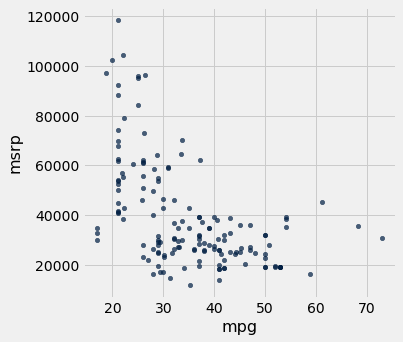

In [13]:
hybrid.scatter('mpg', 'msrp')

In [14]:
#generate a scatter plot below
# comparing the hybrid vehicles' acceleration and msrp




In [15]:
suv = hybrid.where('class', 'SUV')
suv.num_rows

39

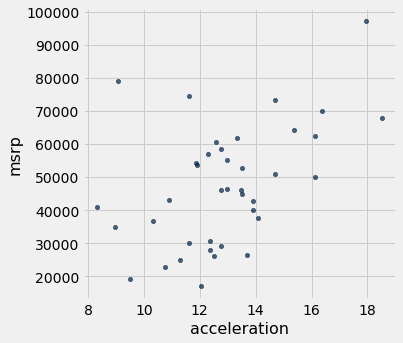

In [16]:
suv.scatter('acceleration', 'msrp')

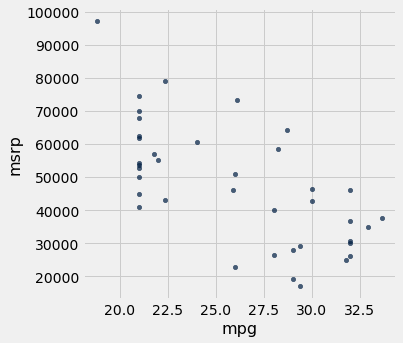

In [17]:
suv.scatter('mpg', 'msrp')

In [18]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    ...
    ...

In [19]:
Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

ValueError: The column 'msrp (standard units)' contains non-numerical values. A plot cannot be drawn for this column.

In [20]:
Table().with_columns(
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
    'msrp (standard units)',         standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

ValueError: The column 'msrp (standard units)' contains non-numerical values. A plot cannot be drawn for this column.

## Correlation ##

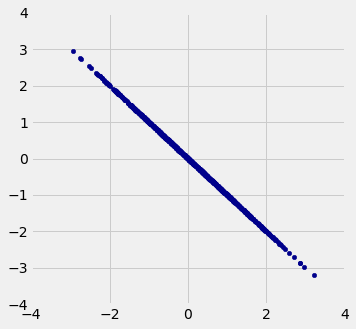

In [21]:
r_scatter(-1)

## Calculating $r$ ##

In [22]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


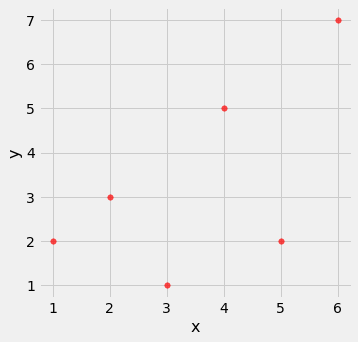

In [23]:
t.scatter('x', 'y', s=30, color='red')

In [24]:
t = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t

x,y,x (standard units),y (standard units)
1,2,None,None
2,3,None,None
3,1,None,None
4,5,None,None
5,2,None,None
6,7,None,None


In [25]:
t = t.with_columns('product of standard units', t.column(2) * t.column(3))
t

TypeError: unsupported operand type(s) for *: 'NoneType' and 'NoneType'

In [ ]:
# r is the average of the products of the standard units

...
...

In [ ]:
def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    x_in_standard_units = standard_units(t.column(x))
    y_in_standard_units = standard_units(t.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)

In [ ]:
correlation(t, 'x', 'y')

In [ ]:
# what does the above correlation mean in words?


In [ ]:
correlation(suv, 'mpg', 'msrp')

In [ ]:
# what does the above correlation mean in words?


In [ ]:
correlation(suv, 'acceleration', 'msrp')

In [ ]:
# what does the above correlation mean in words?


### Switching Axes ###

In [ ]:
correlation(t, 'x', 'y')

In [ ]:
t.scatter('x', 'y', s=30, color='red')

In [ ]:
t.scatter('y', 'x', s=30, color='red')

In [ ]:
correlation(t, 'y', 'x')

### Nonlinearity ###

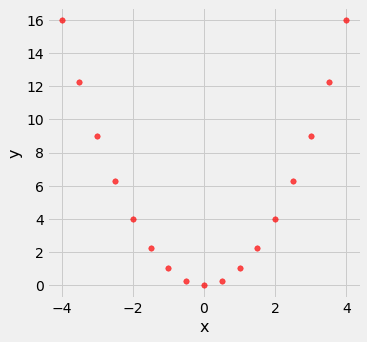

In [26]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

In [27]:
correlation(nonlinear, 'x', 'y')

NameError: name 'correlation' is not defined

### Outliers ###

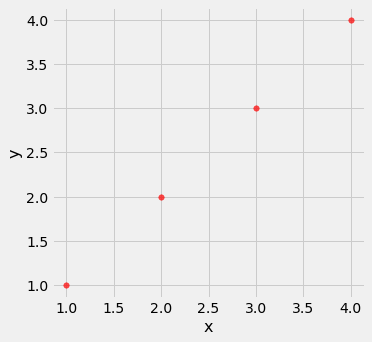

In [28]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

In [29]:
correlation(line, 'x', 'y')

NameError: name 'correlation' is not defined

In [ ]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [ ]:
correlation(outlier, 'x', 'y')

### Ecological Correlations ###

In [ ]:
sat2014 = Table.read_table('data/sat2014.csv').sort('State')
sat2014

In [ ]:
sat2014.scatter('Critical Reading', 'Math')

In [ ]:
correlation(sat2014, 'Critical Reading', 'Math')

In [ ]:
# what does the above correlation value mean in words?


In [ ]:
# think back on your PSAT or SAT scores, was this true for you?

